In [1]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm, LogNorm, SymLogNorm
from astropy.cosmology import Planck18 as cosmo

In [2]:
from astropy.io import fits
hf = fits.open(os.path.join(os.getenv('CENSAI_PATH'), "data", "kappa_000000_xy.fits"))

In [20]:
hf["PRIMARY"].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  188                                                  
NAXIS2  =                  188                                                  
EXTEND  =                    T                                                  
SUBID   =                    0                                                  
HALOID  =                    0                                                  
MASS    =    38878.03471773775 / Total mass in the halo, in 10^{10} solar mass u
CUTMASS =     2096.38392650772 / Total mass in the cutout in 10^{10} solar mass 
CREATED = '21-12-13_19-23-40'                                                   
OFFSET0 =                    0                                                  
OFFSET1 =                   

In [3]:
hf.info()

Filename: /home/alexandre/Desktop/Projects/Censai/data/kappa_000000_xy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (188, 188)   float32   
  1  LENSING POTENTIAL    1 ImageHDU         8   (188, 188)   float32   
  2  DEFLECTION ANGLES    1 ImageHDU         9   (2, 188, 188)   float32   
  3  SHEAR1        1 ImageHDU         8   (188, 188)   float32   
  4  SHEAR2        1 ImageHDU         8   (188, 188)   float32   
  5  KAPPA VARIANCE    1 ImageHDU         8   (188, 188)   float32   
  6  DEFLECTION ANGLES VARIANCE    1 ImageHDU         9   (2, 188, 188)   float32   


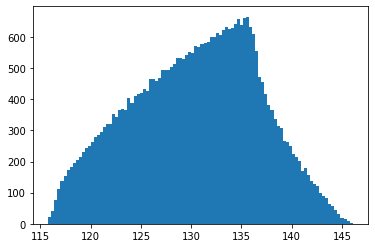

In [4]:
psi = hf[1].data
plt.hist(psi.ravel(), bins=100);

In [5]:
# x = (1. / cosmo.angular_diameter_distance(0.5).value * 3600 / np.pi * 180 * cosmo.h) 

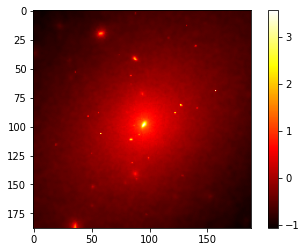

In [8]:
plt.imshow(np.log(hf[0].data), cmap="hot")
plt.colorbar()

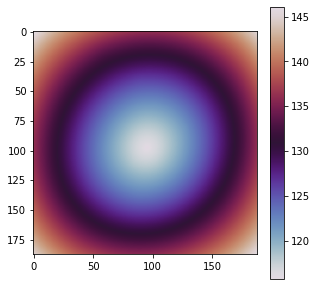

In [30]:
psi = hf[1].data
plt.figure(figsize=(5, 5))
plt.imshow(psi, cmap="twilight")
plt.colorbar()

In [42]:
dx = hf["PRIMARY"].header["CD1_1"]
dx * 188

11.29280625354023

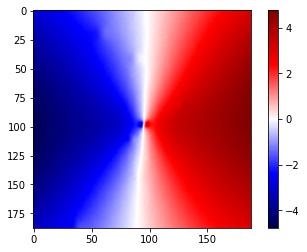

In [28]:
plt.imshow(np.gradient(psi, dx)[1], cmap="seismic", norm=CenteredNorm())
plt.colorbar()

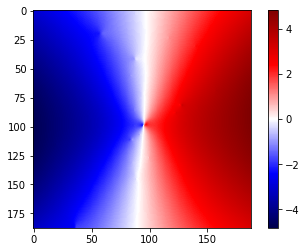

In [41]:
alpha = hf[2].data
plt.imshow(alpha[..., 0], cmap="seismic", norm=CenteredNorm())
plt.colorbar()

In [10]:
alpha.max()

4.829308

In [33]:
gam1 = hf[3].data
gam2 = hf[4].data
gam = np.sqrt(gam1**2 + gam2**2)

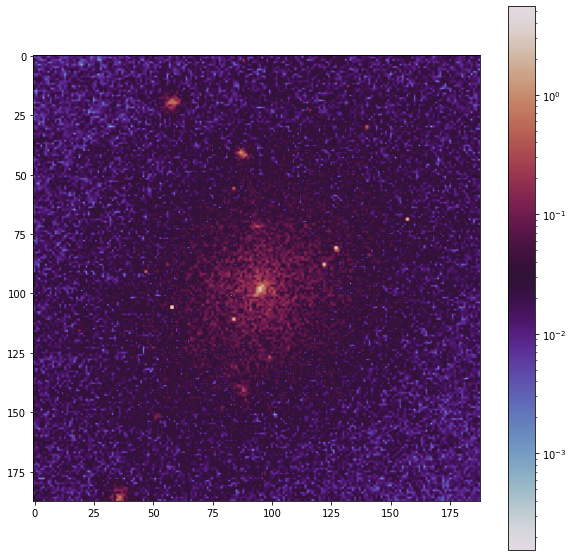

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(gam, cmap="twilight", norm=LogNorm())
plt.colorbar()

In [13]:
gam1 = hf[3].data

In [39]:
gam.min()

0.00015512425